### Because it converts a low bias and hight variance to a low bias and low varaince algorithm.

Random Forest is like a superstar among machine learning algorithms, and there are some key reasons why it often performs better than other methods. Let's explain these reasons in a beginner-friendly way:

1. Ensemble of Decision Trees: Random Forest is not just one decision tree; it's like having a team of decision trees. Think of it as asking multiple experts for their opinions instead of relying on a single person. Each decision tree (or expert) provides its prediction based on the data.

2. Reduced Overfitting: Decision trees can sometimes become too focused on the training data and perform poorly on new, unseen data (overfitting). Random Forest helps by averaging the predictions from many decision trees. It's like taking the average of several guesses, which often results in a more accurate and balanced answer.

3. Handling Noisy Data: Real-world data can be messy and have outliers or errors. Random Forest is robust and less sensitive to noisy data because it aggregates the opinions of many trees. It's like having a group discussion where one loud voice doesn't dominate.

4. Feature Importance: Random Forest can tell you which features (factors) are the most important in making predictions. This helps you understand your data better and focus on the most relevant information.

5. Handling Large Datasets: It works well with large datasets that have many features. It can handle a lot of data without getting overwhelmed, making it versatile for various applications.

6. Versatility: Random Forest can be used for both classification (like identifying objects in images) and regression tasks (like predicting prices). Its adaptability makes it suitable for many real-world problems.

7. Reducing Bias: By using randomness when building each decision tree, Random Forest can help reduce the bias that might exist in the data. It's like mixing things up to get a more unbiased viewpoint.

8. Bagging: Random forests use a technique called bagging to train the decision trees. Bagging works by randomly sampling the training data with replacement to create multiple subsets of the data. Each decision tree is trained on a different subset of the data. This helps to reduce overfitting, which is when a model learns the training data too well and does not generalize well to new data.

9. Feature randomness: Random forests also use a technique called feature randomness to train the decision trees. Feature randomness works by randomly selecting a subset of features to split on at each node of the tree. This helps to improve the accuracy of the predictions by preventing the trees from overfitting to individual features.


### Here is a beginner-friendly analogy to help you understand why random forests perform well:

Imagine that you are trying to predict the weather for tomorrow. You could ask a group of experts for their predictions. Each expert would likely use their own knowledge and experience to make a prediction. However, some experts may be more accurate than others. Additionally, some experts may be more biased towards certain types of weather.

A random forest would work by combining the predictions of all the experts. This would help to reduce the variance of the predictions and produce a more accurate overall prediction. Additionally, the random forest would be less biased than any individual expert.

Overall, random forests are a powerful and versatile machine learning algorithm that can be used for a variety of tasks. They are a good choice for many beginners because they are easy to use and produce accurate results.



In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.34, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
X.shape

(500, 2)

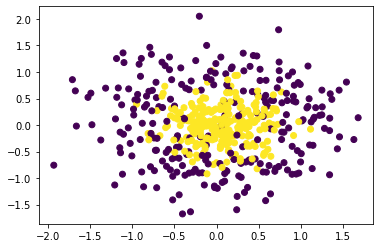

In [8]:
plt.scatter(X[:,0], X[:,1], c=y)

# First with Decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

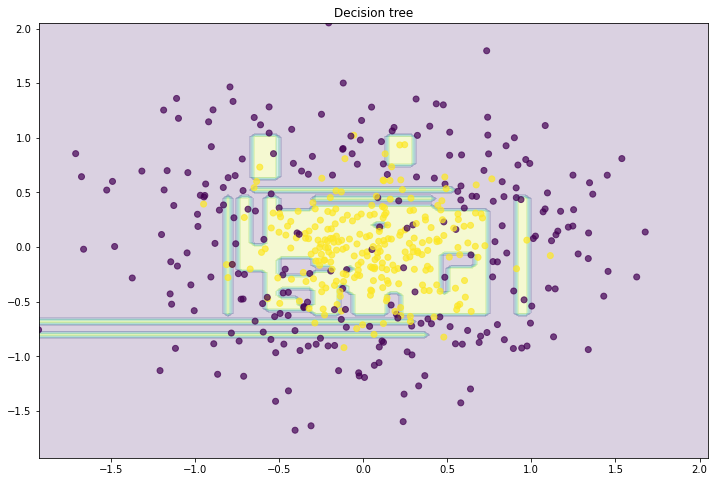

In [10]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

# Second with Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

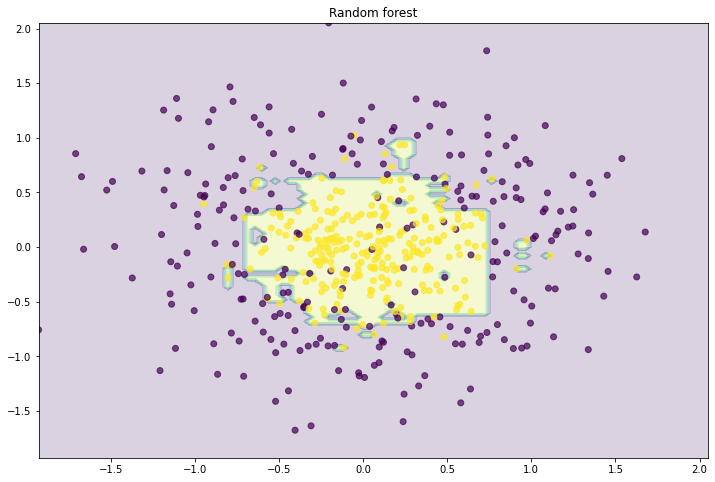

In [12]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

# Same Example for regression problem

In [13]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

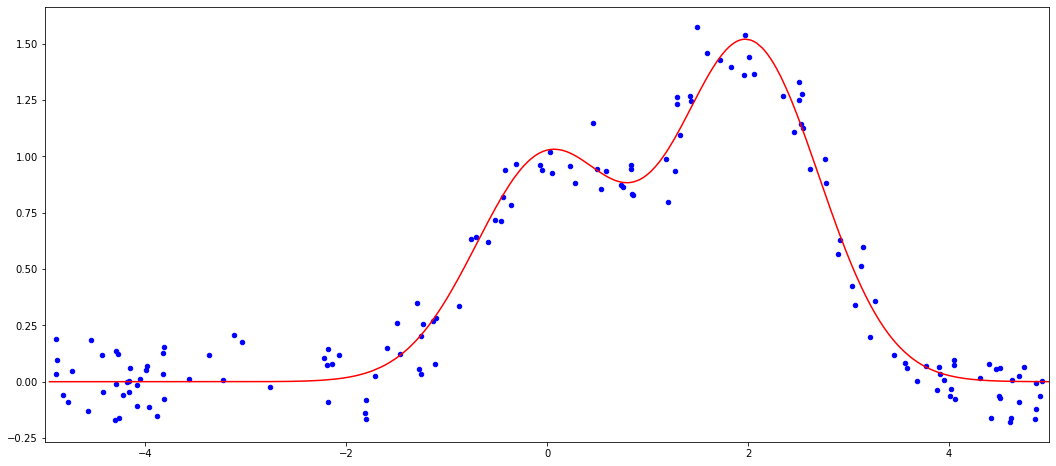

In [14]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5]) # THe red line is the true nature of this data upon which the datas are created by adding some noise

# First Decision Tree regression

Text(0.5, 1.0, 'Decision tree, MSE = 19.27')

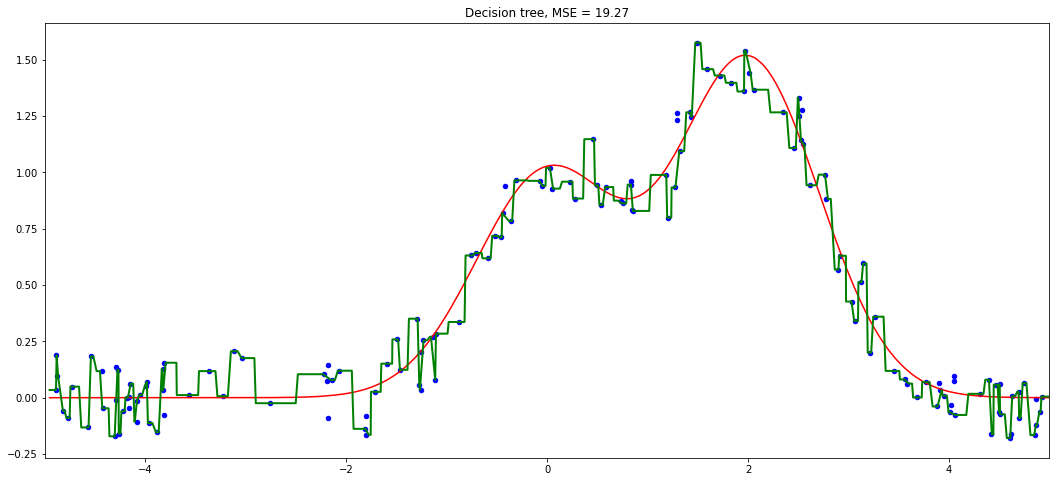

In [18]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))
# the green line is the regression line which is trying to pass through each points which is clearly overfitting
# low bias but high variance since it only performs well in traingin data but it will not perform good in testing data

# Second Random Forest regression

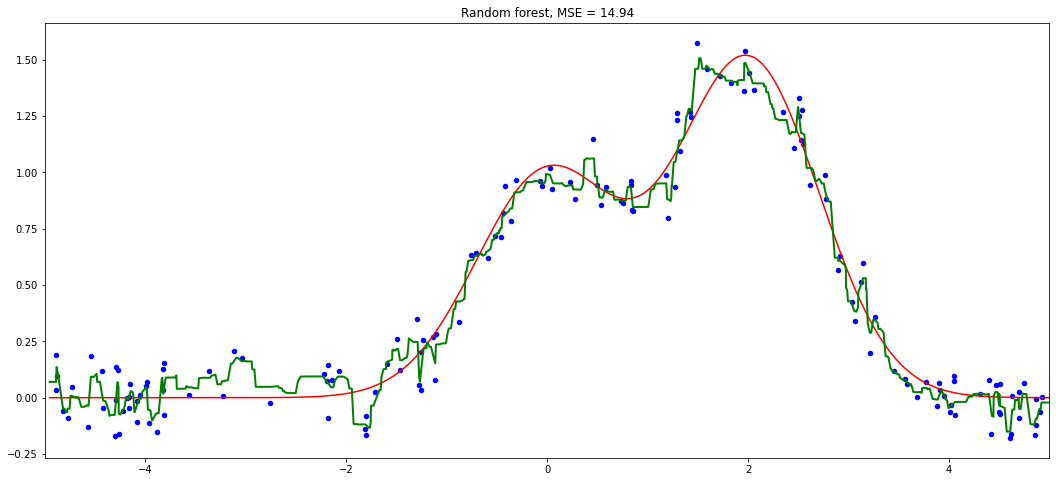

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));
# THis is the regression line by random forest in comparison to above plot the variance has been decrease and the bias has
# slighly increased. Also the MSE has decreased, therfre random forest it better tha decision tree